In [53]:
from yfetch import get_stock_history
import pandas as pd

In [ ]:
# for 1 week
call_prices = {
  'SPY': 5.44/580,
  'QQQ': 5.87/510,
  'TQQQ': 2.16/67,
  'MAGS': 0.70/51.5,
  'FNGS': 0.6/44,
}

Loaded cached history for SPY (261 rows)
Loaded cached history for QQQ (261 rows)
Loaded cached history for TQQQ (261 rows)
Loaded cached history for FNGS (261 rows)


<Axes: title={'center': '1w Call Performance'}, xlabel='Date', ylabel='profit factor'>

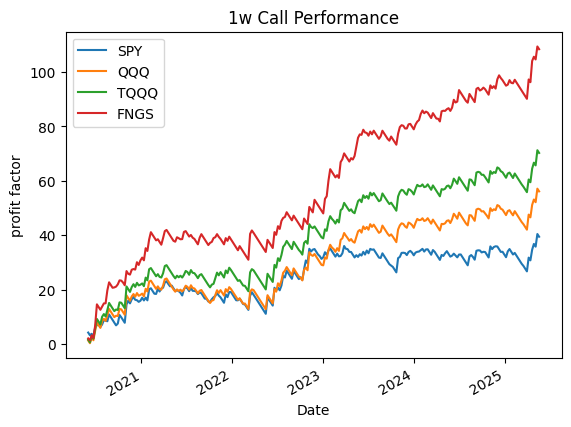

In [55]:
cp_map = {}

for symbol, cp in call_prices.items():
  history = get_stock_history(symbol, period='5y', interval='1wk')
  change = history['Close'].pct_change(periods=1).dropna()
  call_profit = (change / cp - 1).clip(lower=-1)
  cp_map[symbol] = call_profit

cp_df = pd.DataFrame(cp_map)
cp_df.dropna().cumsum().plot(title='1w Call Performance', ylabel='profit factor', xlabel='Date')



In [56]:
# Create a simple table with mean and median of call_profit for each symbol
stats_df = pd.DataFrame({
    'Mean': cp_df.mean(),
    'Median': cp_df.median()
})

# Display the table without formatting
display(stats_df)

,Mean,Median
SPY,0.151731,-0.563071
QQQ,0.215778,-0.724405
TQQQ,0.270069,-0.842078
FNGS,0.416612,-0.739949
